In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [4]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 293s 2us/step


In [5]:
train_images,test_images=train_images/255.0,test_images/255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

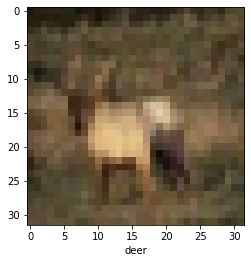

In [10]:
plt.imshow(train_images[3])
plt.xlabel(class_names[train_labels[3][0]])
plt.show()

In [13]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [16]:
epochs_hist=model.fit(train_images,train_labels,epochs=4,validation_split=0.2)

Epoch 1/4
1250/1250 [==============================] - 87s 69ms/step - loss: 1.8233 - accuracy: 0.3210 - val_loss: 1.3519 - val_accuracy: 0.5078
Epoch 2/4
1250/1250 [==============================] - 86s 69ms/step - loss: 1.2585 - accuracy: 0.5463 - val_loss: 1.1949 - val_accuracy: 0.5803
Epoch 3/4
1250/1250 [==============================] - 86s 69ms/step - loss: 1.0913 - accuracy: 0.6123 - val_loss: 1.0711 - val_accuracy: 0.6258
Epoch 4/4
1250/1250 [==============================] - 91s 73ms/step - loss: 0.9813 - accuracy: 0.6512 - val_loss: 0.9970 - val_accuracy: 0.6530


In [17]:
model.evaluate(test_images,test_labels,verbose=1)

313/313 [==============================] - 6s 19ms/step - loss: 0.9800 - accuracy: 0.6548


[0.9799608588218689, 0.6547999978065491]